### Well55a

Spencer Harris  
Data Analysis  
Fogland Point, Tiverton, Rhode Island, US

**The data is pressure/temperature/conductivity data collected in a domestic well at 30 minute intervals. There is also another data set that is composed of barometric pressure for compensation. The exact source of that data is from In-Situ AquaTroll 200s that I installed on Fogland Point, RI. The format of the data is CSV. Also the is Percipitation data being loaded in from a Wunderground Personal Weater Station nearby to compare against the water level data**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%pwd
#os.listdir()

'/home/sbhgeo/Documents/Fogland/Notebooks/Transducer_Data/Fogland'

In [3]:
# name/number of the well that we are looking at in this notebook
subject_well = '55a'

In [4]:
# pulling in the hard measurements (water levels retrieved with water level sounder) and well TOC elevations
man_measures = pd.read_csv('../data/All_WLs.csv', delimiter=',')
# pulling in the transducer data
barofile = '../data/troll/2017-08-17_16-05-25_fogland-point_Log_baro081717.csv'
well55afile = '../data/troll/2017-08-17_16-00-56_fogland-point_Log_55a081717.csv'
baro = pd.read_csv(barofile, skiprows=25)
well = pd.read_csv(well55afile, skiprows=25)

In [5]:
#check for size of data
print (baro.shape, well.shape)

(4122, 3) (4122, 6)


In [6]:
well[:10]

,Date Time,Pressure (psi) (534454),Temperature (°C) (534454),Actual Conductivity (µS/cm) (534454),Specific Conductivity (µS/cm) (534454),Salinity (PSU) (534454)
0,2017-08-17 16:00:56.004,14.71578,25.99074,0.00,0.00,0.00000
1,2017-08-17 16:30:56.004,27.14682,11.90380,15601.05,20805.21,12.41600
2,2017-08-17 17:00:56.004,27.19085,11.89618,15630.15,20848.07,12.44351
3,2017-08-17 17:30:56.004,27.23350,11.89362,15641.55,20864.63,12.45416
4,2017-08-17 18:00:56.004,27.24976,11.89255,15642.82,20866.89,12.45559
5,2017-08-17 18:30:56.004,27.26987,11.89127,15662.38,20893.67,12.47289
6,2017-08-17 19:00:56.004,27.28554,11.89127,15663.52,20895.20,12.47388
7,2017-08-17 19:30:56.004,27.29317,11.89108,15673.81,20909.02,12.48284
8,2017-08-17 20:00:56.004,27.30034,11.89054,15668.33,20901.99,12.47827
9,2017-08-17 20:30:56.004,27.31096,11.88981,15668.48,20902.58,12.47862


Since the two data frames are of different sizes we need to inspect them and try to line/match them up temporally the best we can. This shouldn't be too hard because both of the files have one measurement every 30 minutes. If the two files' temporal resolution was different then it would be more difficult

In [7]:
baro[:10]

,Date Time,Pressure (psi) (525373),Temperature (°C) (525373)
0,2017-08-17 16:05:25.278,14.71757,20.58728
1,2017-08-17 16:35:25.278,14.71992,19.49414
2,2017-08-17 17:05:25.278,14.72049,18.43887
3,2017-08-17 17:35:25.278,14.71942,18.11523
4,2017-08-17 18:05:25.278,14.71662,18.02957
5,2017-08-17 18:35:25.278,14.72028,18.01942
6,2017-08-17 19:05:25.278,14.71957,17.98892
7,2017-08-17 19:35:25.278,14.72536,18.00272
8,2017-08-17 20:05:25.278,14.73132,18.00127
9,2017-08-17 20:35:25.278,14.72902,17.99982


So if we inspect the data we note that the times match up quite nicely

In [8]:
#matching up our readings/indicies
#well = well.shift(4)

In [9]:
well[:10]

,Date Time,Pressure (psi) (534454),Temperature (°C) (534454),Actual Conductivity (µS/cm) (534454),Specific Conductivity (µS/cm) (534454),Salinity (PSU) (534454)
0,2017-08-17 16:00:56.004,14.71578,25.99074,0.00,0.00,0.00000
1,2017-08-17 16:30:56.004,27.14682,11.90380,15601.05,20805.21,12.41600
2,2017-08-17 17:00:56.004,27.19085,11.89618,15630.15,20848.07,12.44351
3,2017-08-17 17:30:56.004,27.23350,11.89362,15641.55,20864.63,12.45416
4,2017-08-17 18:00:56.004,27.24976,11.89255,15642.82,20866.89,12.45559
5,2017-08-17 18:30:56.004,27.26987,11.89127,15662.38,20893.67,12.47289
6,2017-08-17 19:00:56.004,27.28554,11.89127,15663.52,20895.20,12.47388
7,2017-08-17 19:30:56.004,27.29317,11.89108,15673.81,20909.02,12.48284
8,2017-08-17 20:00:56.004,27.30034,11.89054,15668.33,20901.99,12.47827
9,2017-08-17 20:30:56.004,27.31096,11.88981,15668.48,20902.58,12.47862


In [10]:
print(well.columns)
print(baro.columns)

Index(['Date Time', 'Pressure (psi) (534454)', 'Temperature (°C) (534454)',
       'Actual Conductivity (µS/cm) (534454)',
       'Specific Conductivity (µS/cm) (534454)', 'Salinity (PSU) (534454)'],
      dtype='object')
Index(['Date Time', 'Pressure (psi) (525373)', 'Temperature (°C) (525373)'], dtype='object')


**"manual" barometric compensation** derived from [In-Situ Inc.](https://in-situ.com/wp-content/uploads/2014/11/Manual-Level-Mode-Correction-for-Non-Vented-Sensors.pdf)  

Basic idea: Depth is the amount of water over the pressure sensor plus barometric pressure.  

Water level can be calculated in meters using the following equation: D = (0.703073 X (Pm-Bm)) / SG

In [11]:
well['compd_(psi)']  = well['Pressure (psi) (534454)'].sub(baro['Pressure (psi) (525373)'].squeeze())
well['baro_reading'] = baro['Pressure (psi) (525373)']
Lr = man_measures
# Lr = reference level
well['Transducer_level_ft'] = (well['compd_(psi)'] * 2.30666) 
well['water_level_ft_LMSL'] = (Lr.iloc[0][' TOC Elevation (LSML)']) - (well['compd_(psi)'] * 2.30666)

Below the date/time is being converted into a format that Pandas can read and then it is being assigned as the index for the data frames

In [12]:
well['Datetime'] = pd.to_datetime(well['Date Time'], errors='coerce')
well = well.set_index('Datetime')
well = well.drop('Date Time', 1)

baro['Datetime'] = pd.to_datetime(baro['Date Time'], errors='coerce')
baro = baro.set_index('Datetime')
baro= baro.drop('Date Time', 1)

In [13]:
well[:10]

,Pressure (psi) (534454),Temperature (°C) (534454),Actual Conductivity (µS/cm) (534454),Specific Conductivity (µS/cm) (534454),Salinity (PSU) (534454),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL
Datetime,,,,,,,,,
2017-08-17 16:00:56.004,14.71578,25.99074,0.00,0.00,0.00000,-0.00179,14.71757,-0.004129,21.536029
2017-08-17 16:30:56.004,27.14682,11.90380,15601.05,20805.21,12.41600,12.42690,14.71992,28.664633,-7.132733
2017-08-17 17:00:56.004,27.19085,11.89618,15630.15,20848.07,12.44351,12.47036,14.72049,28.764881,-7.232981
2017-08-17 17:30:56.004,27.23350,11.89362,15641.55,20864.63,12.45416,12.51408,14.71942,28.865728,-7.333828
2017-08-17 18:00:56.004,27.24976,11.89255,15642.82,20866.89,12.45559,12.53314,14.71662,28.909693,-7.377793
2017-08-17 18:30:56.004,27.26987,11.89127,15662.38,20893.67,12.47289,12.54959,14.72028,28.947637,-7.415737
2017-08-17 19:00:56.004,27.28554,11.89127,15663.52,20895.20,12.47388,12.56597,14.71957,28.985420,-7.453520
2017-08-17 19:30:56.004,27.29317,11.89108,15673.81,20909.02,12.48284,12.56781,14.72536,28.989665,-7.457765
2017-08-17 20:00:56.004,27.30034,11.89054,15668.33,20901.99,12.47827,12.56902,14.73132,28.992456,-7.460556


In [14]:
man_measures['Datetime'] = pd.to_datetime(man_measures['Date Time'])
man_measures = man_measures.set_index('Datetime')
man_measures= man_measures.drop(('Date Time'), 1)
man_measures= man_measures.drop(('date'), 1)
man_measures= man_measures.drop(('time'), 1)
# combine the above three lines into 1 using a list
man_measures.columns


Index(['well', 'lat ', 'lon', 'feet below TOC', ' TOC Elevation (LSML)',
       'Water level above LMSL'],
      dtype='object')

Below we have selected out the manual reading that pertain to the `subject_well` we are currently looking at  

The next level of efficency here would be to have the script automatically select where the transducer data matches with (is within 29 minutes) of a manual level.  

But we are just going to look above and pick which row corresponds with the first few transducer readings.

In [15]:
well_measures = man_measures.loc[man_measures['well'].str.contains(subject_well)==True, : ]
well_measures

,well,lat,lon,feet below TOC,TOC Elevation (LSML),Water level above LMSL
Datetime,,,,,,
2017-06-17 14:36:00,55a,41.561401,-71.219786,14.79,21.4448,6.6548
2017-08-16 15:04:00,55a,41.561401,-71.219786,21.37,21.4448,0.0748
2017-08-17 17:26:00,55a,41.561401,-71.219786,20.18,21.4448,1.2648
2017-11-11 11:06:00,55a,41.561401,-71.219786,15.30,21.4448,6.1448


#### specific to this well
In this case (subject_well = '55a') we are picking row 2 which has a Datetime index of `2017-08-17 17:39:00` which matches up nicely with the transducer's 3rd reading, seen on row 2 of the `well56` dataframe, which has a Datetime index of `2017-08-17 17:34:14.116`   

We will use the manual measurement to come up with our transducer's setting in the well (`man_measures`'s **feet below TOC** + `well56`'s **Transducer_level_ft**)

In [16]:
transducer_set = well_measures.iloc[2]['feet below TOC'] + well.iloc[3]['Transducer_level_ft']
transducer_set

49.045727772799992

In [17]:
well['calculated_depth'] = transducer_set - well['Transducer_level_ft'] 
well['GW_elevation_ft_(LSML)'] = well_measures.iloc[2][' TOC Elevation (LSML)'] - well['calculated_depth']
well[:]

,Pressure (psi) (534454),Temperature (°C) (534454),Actual Conductivity (µS/cm) (534454),Specific Conductivity (µS/cm) (534454),Salinity (PSU) (534454),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL,calculated_depth,GW_elevation_ft_(LSML)
Datetime,,,,,,,,,,,
2017-08-17 16:00:56.004,14.71578,25.99074,0.00,0.00,0.00000,-0.00179,14.71757,-0.004129,21.536029,49.049857,-27.605057
2017-08-17 16:30:56.004,27.14682,11.90380,15601.05,20805.21,12.41600,12.42690,14.71992,28.664633,-7.132733,20.381095,1.063705
2017-08-17 17:00:56.004,27.19085,11.89618,15630.15,20848.07,12.44351,12.47036,14.72049,28.764881,-7.232981,20.280847,1.163953
2017-08-17 17:30:56.004,27.23350,11.89362,15641.55,20864.63,12.45416,12.51408,14.71942,28.865728,-7.333828,20.180000,1.264800
2017-08-17 18:00:56.004,27.24976,11.89255,15642.82,20866.89,12.45559,12.53314,14.71662,28.909693,-7.377793,20.136035,1.308765
2017-08-17 18:30:56.004,27.26987,11.89127,15662.38,20893.67,12.47289,12.54959,14.72028,28.947637,-7.415737,20.098091,1.346709
2017-08-17 19:00:56.004,27.28554,11.89127,15663.52,20895.20,12.47388,12.56597,14.71957,28.985420,-7.453520,20.060307,1.384493
2017-08-17 19:30:56.004,27.29317,11.89108,15673.81,20909.02,12.48284,12.56781,14.72536,28.989665,-7.457765,20.056063,1.388737
2017-08-17 20:00:56.004,27.30034,11.89054,15668.33,20901.99,12.47827,12.56902,14.73132,28.992456,-7.460556,20.053272,1.391528


In [18]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import numpy as np
% matplotlib inline

(-15, 15)

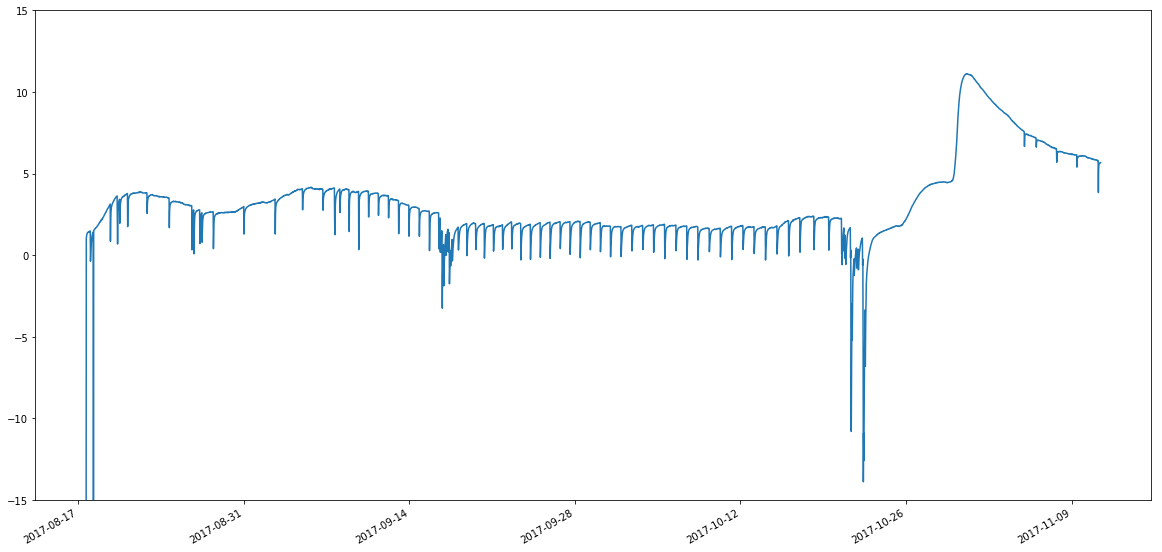

In [19]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(well['GW_elevation_ft_(LSML)'])
fig.autofmt_xdate()
plt.ylim(-15,15)

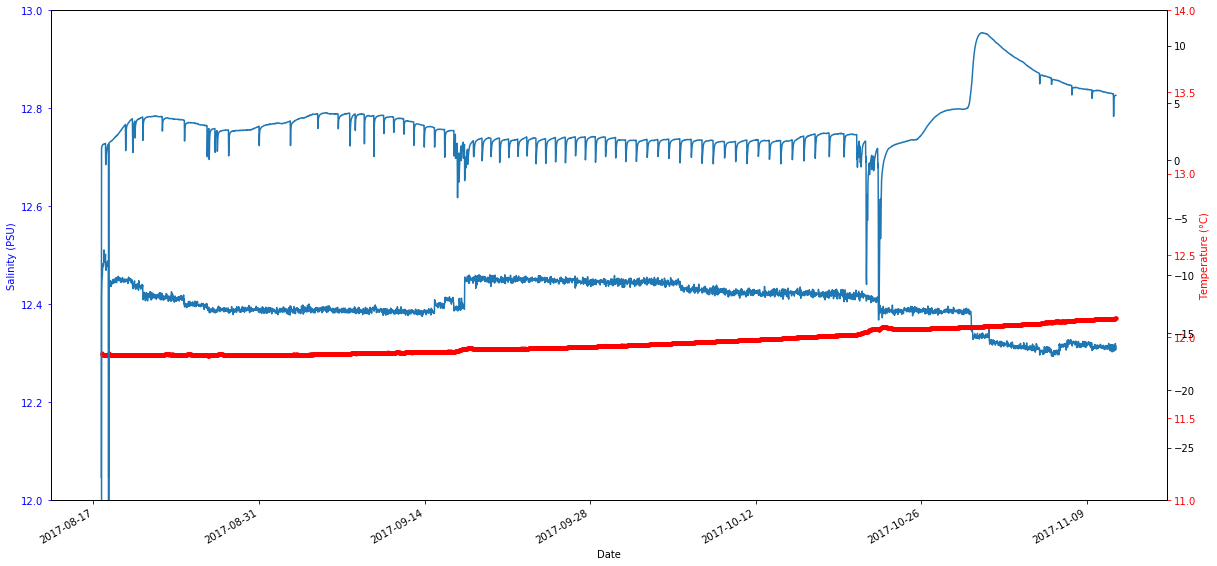

In [20]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(well['Salinity (PSU) (534454)'])
ax1.set_xlabel('Date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Salinity (PSU)', color='b')
ax1.tick_params('y', colors='b')
plt.ylim(12,13)

ax2 = ax1.twinx()
s2 = well['Temperature (°C) (534454)']
ax2.plot(s2, 'r.')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params('y', colors='r')
plt.ylim(11,14)

ax3 = ax1.twinx()
s3 = well['GW_elevation_ft_(LSML)']
ax3.plot(s3)
#ax2.set_ylabel('Temperature (°C)', color='r')
#ax2.tick_params('y', colors='r')
#plt.ylim(11,14)



fig.autofmt_xdate()
fig.autofmt_xdate()
plt.show()

### Fetching Precipitation from Wunderground
modified from https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/  

we are going to use this https://www.wunderground.com/personal-weather-station/dashboard?ID=KRIPORTS37#history/s20171019/e20171118/mmonth weather station

In [21]:
import requests
import pandas as pd
from dateutil import parser, rrule
from datetime import datetime, time, date
import time
import io

In [22]:
def getRainfallData(station, day, month, year):
    """
    Function to return a data frame of minute-level weather data for a single Wunderground PWS station.
    
    Args:
        station (string): Station code from the Wunderground website
        day (int): Day of month for which data is requested
        month (int): Month for which data is requested
        year (int): Year for which data is requested
    
    Returns:
        Pandas Dataframe with weather data for specified station and date.
    """
    url = "http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1"
    full_url = url.format(station=station, day=day, month=month, year=year)
    # Request data from wunderground data
    response = requests.get(full_url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    data = response.text
    # remove the excess <br> from the text data
    data = data.replace('<br>', '')
    # Convert to pandas dataframe (fails if issues with weather station)
    try:
        dataframe = pd.read_csv(io.StringIO(data), index_col=False)
        dataframe['station'] = station
    except Exception as e:
        print("Issue with date: {}-{}-{} for station {}".format(day,month,year, station))
        return None
    return dataframe

In [23]:
# Generate a list of all of the dates we want data for
start_date = "2017-08-01"
end_date = "2017-11-17"
start = parser.parse(start_date)
end = parser.parse(end_date)
dates = list(rrule.rrule(rrule.DAILY, dtstart=start, until=end))

# Create a list of stations here to download data for
stations = ["KRIPORTS37"]
# Set a backoff time in seconds if a request fails
backoff_time = 10
data = {}

In [24]:
# Gather data for each station in turn and save to CSV.
for station in stations:
    print("Working on {}".format(station))
    data[station] = []
    for date in dates:
        # Print period status update messages
        if date.day % 10 == 0:
            print("Working on date: {} for station {}".format(date, station))
        done = False
        while done == False:
            try:
                weather_data = getRainfallData(station, date.day, date.month, date.year)
                done = True
            except ConnectionError as e:
                # May get rate limited by Wunderground.com, backoff if so.
                print("Got connection error on {}".format(date))
                print("Will retry in {} seconds".format(backoff_time))
                time.sleep(10)
        # Add each processed date to the overall data
        data[station].append(weather_data)
    # Finally combine all of the individual days and output to CSV for analysis.
    pd.concat(data[station]).to_csv("./{}_weather.csv".format(station))

Working on KRIPORTS37
Working on date: 2017-08-10 00:00:00 for station KRIPORTS37
Working on date: 2017-08-20 00:00:00 for station KRIPORTS37
Working on date: 2017-08-30 00:00:00 for station KRIPORTS37
Working on date: 2017-09-10 00:00:00 for station KRIPORTS37
Working on date: 2017-09-20 00:00:00 for station KRIPORTS37
Working on date: 2017-09-30 00:00:00 for station KRIPORTS37
Working on date: 2017-10-10 00:00:00 for station KRIPORTS37
Working on date: 2017-10-20 00:00:00 for station KRIPORTS37
Working on date: 2017-10-30 00:00:00 for station KRIPORTS37
Working on date: 2017-11-10 00:00:00 for station KRIPORTS37


In [25]:
station = 'KRIPORTS37' # Sandy Point Farm, across the channel from Fogland Point
data_raw = pd.read_csv('./{}_weather.csv'.format(station))
data_raw.columns

Index(['Unnamed: 0', 'Time', 'TemperatureF', 'DewpointF', 'PressureIn',
       'WindDirection', 'WindDirectionDegrees', 'WindSpeedMPH',
       'WindSpeedGustMPH', 'Humidity', 'HourlyPrecipIn', 'Conditions',
       'Clouds', 'dailyrainin', 'SolarRadiationWatts/m^2', 'SoftwareType',
       'DateUTC', 'station'],
      dtype='object')

In [26]:
# Give the variables some friendlier names and convert types as necessary.
data_raw['temp'] = data_raw['TemperatureF'].astype(float)
data_raw['rain'] = data_raw['HourlyPrecipIn'].astype(float)
data_raw['date'] = data_raw['DateUTC'].apply(parser.parse)
data_raw['humidity'] = data_raw['Humidity'].astype(float)
data_raw['wind_direction'] = data_raw['WindDirectionDegrees']
data_raw['wind'] = data_raw['WindSpeedMPH']
 
# Extract out only the data we need.
data = data_raw.loc[:, ['date', 'station', 'temp', 'rain', 'humidity', 'wind']]
data = data[(data['date'] >= datetime(2017,8,2)) & (data['date'] <= datetime(2017,11,16))]
 
# There's an issue with some stations that record rainfall ~-2500 where data is missing.
if (data['rain'] < -500).sum() > 10:
    print("There's more than 10 messed up days for {}".format(station))
    
# remove the bad samples
data = data[data['rain'] > -500]
 
# Assign the "day" to every date entry
data['day'] = data['date'].apply(lambda x: x.date())
 
# Get the time, day, and hour of each timestamp in the dataset
data['time_of_day'] = data['date'].apply(lambda x: x.time())
data['day_of_week'] = data['date'].apply(lambda x: x.weekday())    
data['hour_of_day'] = data['time_of_day'].apply(lambda x: x.hour)
# Mark the month for each entry so we can look at monthly patterns
data['month'] = data['date'].apply(lambda x: x.month)

What does this data look like?

In [27]:
#! cat KRIPORTS37_weather.csv

In [28]:
data_raw['Datetime'] = pd.to_datetime(data_raw['Time'])
data_raw = data_raw.set_index('Datetime')
data_raw

,Unnamed: 0,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,...,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station,temp,rain,date,humidity,wind_direction,wind
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-01 00:00:00,0,2017-08-01 00:00:00,66.2,8.1,30.02,South,185,0.9,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:00:00,KRIPORTS37,66.2,0.0,2017-08-01 04:00:00,10.0,185,0.9
2017-08-01 00:05:00,1,2017-08-01 00:05:00,66.2,8.1,30.01,South,185,1.6,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:05:00,KRIPORTS37,66.2,0.0,2017-08-01 04:05:00,10.0,185,1.6
2017-08-01 00:10:00,2,2017-08-01 00:10:00,66.2,8.1,30.02,South,185,1.1,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:10:00,KRIPORTS37,66.2,0.0,2017-08-01 04:10:00,10.0,185,1.1
2017-08-01 00:16:00,3,2017-08-01 00:16:00,66.2,8.1,30.02,South,181,0.9,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:16:00,KRIPORTS37,66.2,0.0,2017-08-01 04:16:00,10.0,181,0.9
2017-08-01 00:21:00,4,2017-08-01 00:21:00,66.2,8.1,30.02,South,182,1.6,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:21:00,KRIPORTS37,66.2,0.0,2017-08-01 04:21:00,10.0,182,1.6
2017-08-01 00:22:00,5,2017-08-01 00:22:00,66.2,8.1,30.01,South,182,2.2,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:22:00,KRIPORTS37,66.2,0.0,2017-08-01 04:22:00,10.0,182,2.2
2017-08-01 00:27:00,6,2017-08-01 00:27:00,66.4,8.2,30.01,South,187,2.2,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:27:00,KRIPORTS37,66.4,0.0,2017-08-01 04:27:00,10.0,187,2.2
2017-08-01 00:32:00,7,2017-08-01 00:32:00,66.4,8.2,30.02,South,182,1.3,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:32:00,KRIPORTS37,66.4,0.0,2017-08-01 04:32:00,10.0,182,1.3
2017-08-01 00:37:00,8,2017-08-01 00:37:00,66.4,8.2,30.01,South,182,1.8,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:37:00,KRIPORTS37,66.4,0.0,2017-08-01 04:37:00,10.0,182,1.8


In [29]:
data_raw = data_raw.drop(('Time'), 1)
data_raw = data_raw.drop(('Unnamed: 0'), 1)
data_raw.columns

Index(['TemperatureF', 'DewpointF', 'PressureIn', 'WindDirection',
       'WindDirectionDegrees', 'WindSpeedMPH', 'WindSpeedGustMPH', 'Humidity',
       'HourlyPrecipIn', 'Conditions', 'Clouds', 'dailyrainin',
       'SolarRadiationWatts/m^2', 'SoftwareType', 'DateUTC', 'station', 'temp',
       'rain', 'date', 'humidity', 'wind_direction', 'wind'],
      dtype='object')

(736557.0, 736649.0)

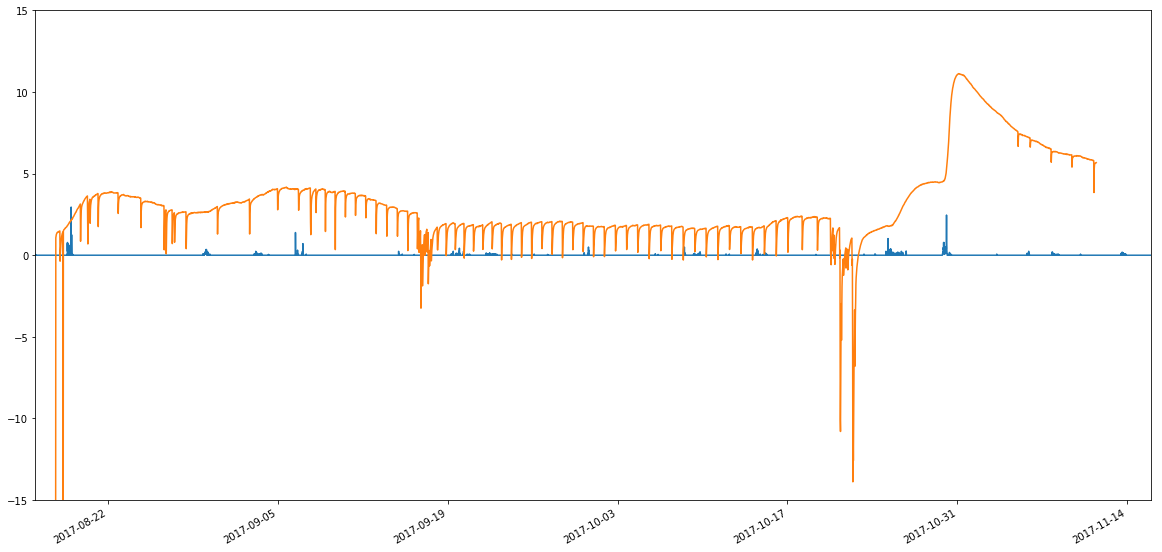

In [30]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

fig.autofmt_xdate()
plt.ylim([-15,15])
plt.xlim(['2017-08-16','2017-11-16'])

In [31]:
!ls -aF

./   .git/		  KRIPORTS37_weather.csv  Well55a.ipynb
../  .ipynb_checkpoints/  Well33.ipynb		  Well56.ipynb


**Lets try and see if tidal patterns have any effect on our transducer data**

In [32]:
%pwd

'/home/sbhgeo/Documents/Fogland/Notebooks/Transducer_Data/Fogland'

### fetching data from NOAA/CO-OPS via the [Data API](https://tidesandcurrents.noaa.gov/api/) 
specifically I am getting data from station [8452660](https://tidesandcurrents.noaa.gov/waterlevels.html?id=8452660&units=standard&bdate=20170501&edate=20171120&timezone=LST/LDT&datum=STND&interval=h&action=data)  
Note that we dont have the *Verified* (`tydl_wl_data`) data for November...seems like the data is updated monthly? we will have to use the predicted values from `tydl_pred_data`

In [33]:
tidal_water_levels = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&format=csv'
tidal_predictions = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&interval=h&format=csv'

In [34]:
tydl_wl_data = pd.read_csv(tidal_water_levels, delimiter=',')
tydl_pred_data = pd.read_csv(tidal_predictions, delimiter=',')

In [35]:
print(tydl_wl_data.columns)
print(tydl_pred_data.columns)

Index(['Date Time', ' Water Level', ' Sigma', ' I', ' L '], dtype='object')
Index(['Date Time', ' Prediction'], dtype='object')


In [36]:
tydl_wl_data['Datetime'] = pd.to_datetime(tydl_wl_data['Date Time'])
tydl_wl_data = tydl_wl_data.set_index('Datetime')
tydl_wl_data.rename(columns={' Water Level': 'Water Level'}, inplace=True)
tydl_wl_data = tydl_wl_data.drop(('Date Time'), 1)

tydl_pred_data['Datetime'] = pd.to_datetime(tydl_pred_data['Date Time'])
tydl_pred_data = tydl_pred_data.set_index('Datetime')
tydl_pred_data.rename(columns={' Prediction': 'Prediction'}, inplace=True)
tydl_pred_data = tydl_pred_data.drop(('Date Time'), 1)

#write a for-loop for the above?

(736557.0, 736649.0)

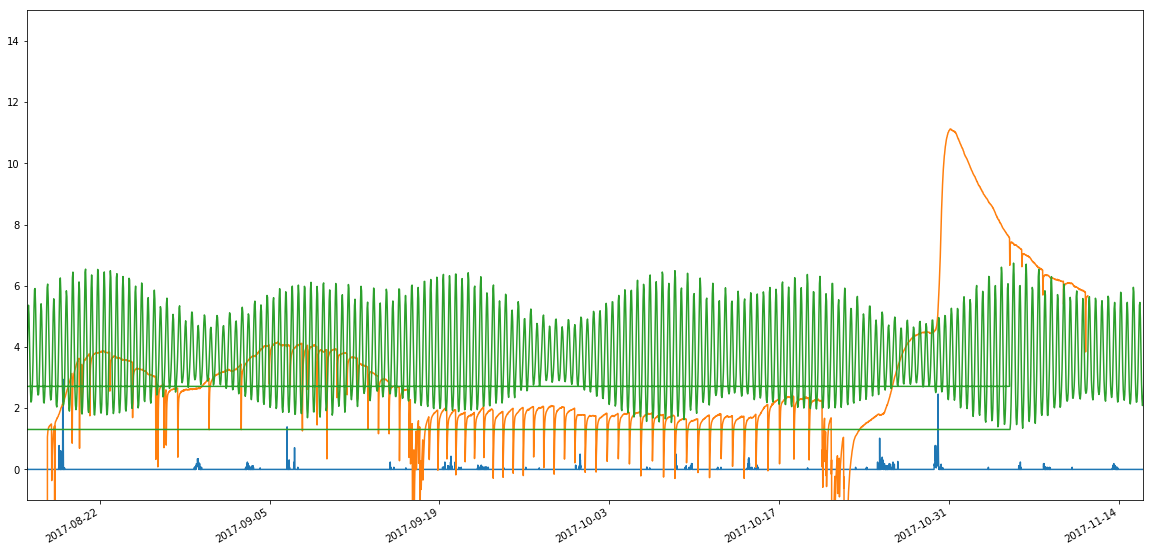

In [37]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_pred_data['Prediction'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

(736557.0, 736649.0)

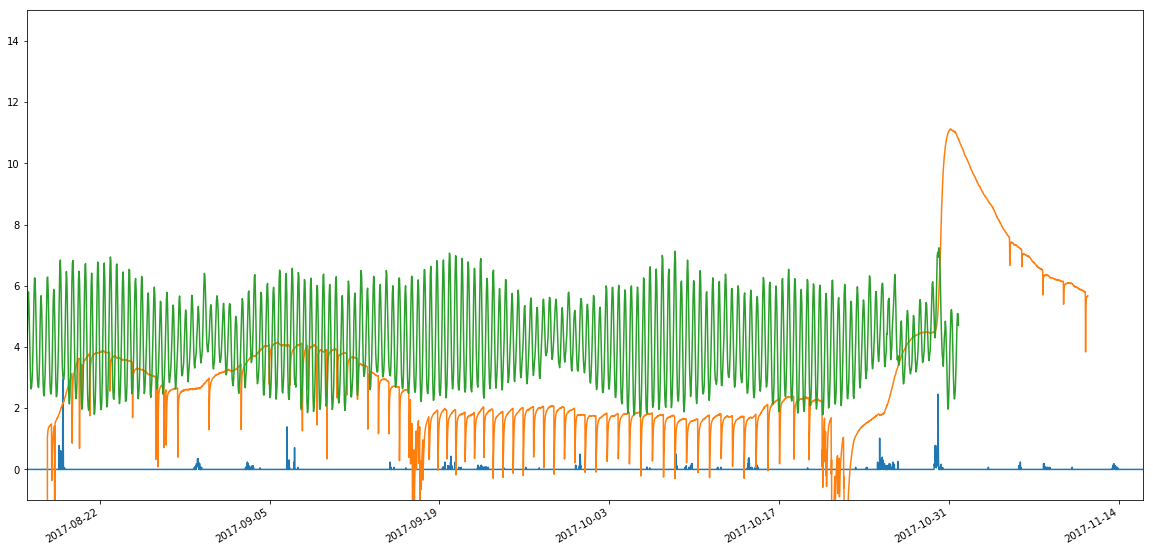

In [38]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_wl_data['Water Level'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

(736626.0, 736633.0)

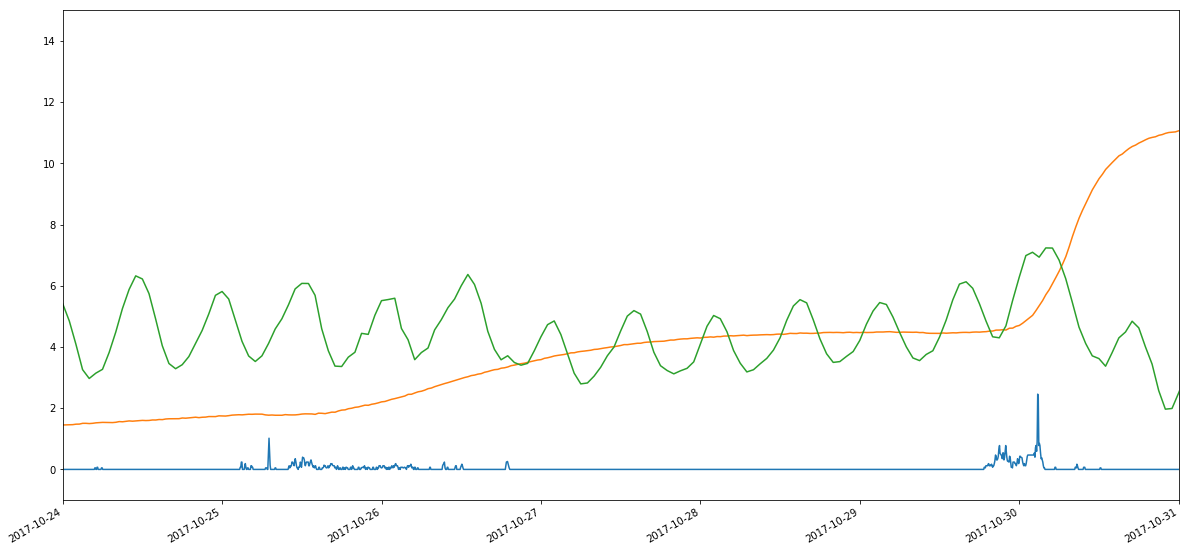

In [40]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_wl_data['Water Level'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-10-24','2017-10-31'])

#### Stripping off index and irrelevant data before analysis continues

In [41]:
def prep4analysis(originaldataframe):
    new = (originaldataframe)
    new = new.reset_index()
    new = new.drop('Datetime', axis =1)
    new = new[3:-3] #removing first and last 3 readings
    new_array = np.array(new)
    new_array = np.reshape(new_array, new_array.shape[0])
    return new, new_array

In [82]:
wl = (well['GW_elevation_ft_(LSML)'])
wl, wl_a = prep4analysis(wl)

tmp = (well['Temperature (°C) (534454)'])
tmp, tmp_a = prep4analysis(tmp)

sal = (well['Salinity (PSU) (534454)'])
sal, sal_a = prep4analysis(sal)

tydl = (tydl_wl_data['Water Level'])
tydl, tydl_a = prep4analysis(tydl)

# FFT analysis with periodogram and welchs
nothing to look at yet...

In [43]:
from scipy import signal

In [44]:
def Periodogram_loglog_plot(x,fs, color):
    f, Pxx_den = signal.periodogram(x,fs)
    plt.loglog(f, Pxx_den, color)
    plt.xlabel('Frequency Hz')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title('Fig D\nperiodogram method, power spectral density');
    
def Welchs_loglog_plot(x,fs, color):
    f, Pxx_den = signal.welch(x, fs, nperseg=1024)
    plt.loglog(f, Pxx_den, color)
    plt.xlabel('Frequency Hz')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title('Fig D\nWelch\'s method, power spectral density');

# FIGURE A

(736557.0, 736649.0)

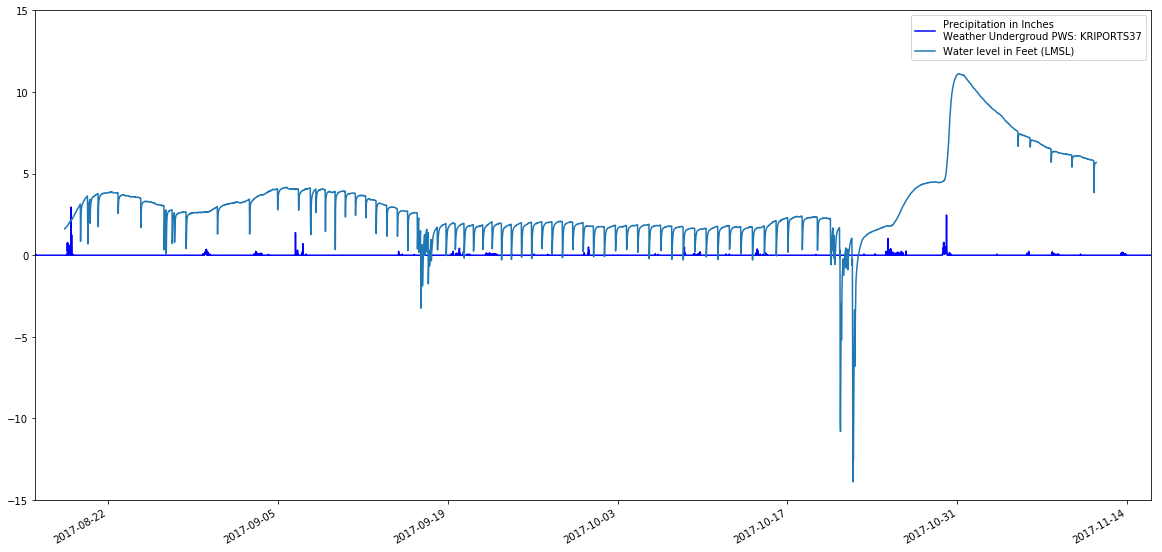

In [66]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'], 'b', label= 'Precipitation in Inches\nWeather Undergroud PWS: KRIPORTS37')
ax1.legend()

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'][36:-3], label= 'Water level in Feet (LMSL)')
ax2.legend()

fig.autofmt_xdate()
plt.ylim([-15,15])
plt.xlim(['2017-08-16','2017-11-16'])

**Figure A.** Well 55a Water level data, Feet (LMSL), and Precipitation, Inches, from adjacent Weather Undergroud Personal Weather Station, PWS: KRIPORTS37.  

This shows the relationship between the precipitation events (*dark blue*) and the water level (*light blue*) in well 55a. As seen in the figure, most precipitation events result in a slightly delayed increase in water level in well 55a.

# FIGURE B

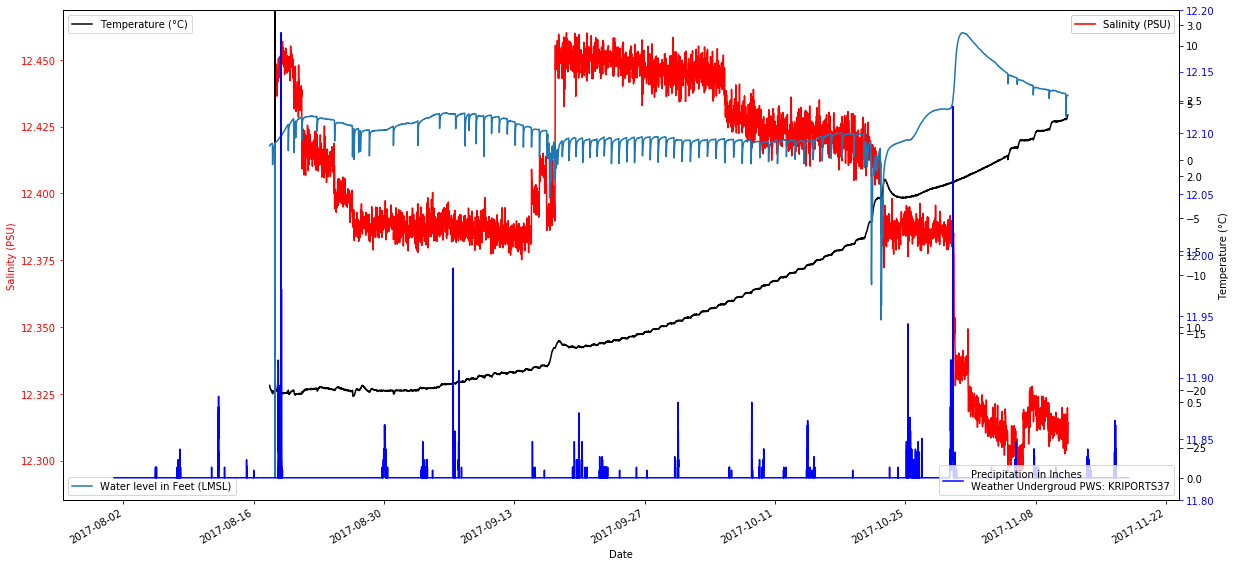

In [80]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(well['Salinity (PSU) (534454)'][36:-3], 'r', label='Salinity (PSU)')
ax1.set_xlabel('Date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Salinity (PSU)', color='r')
ax1.tick_params('y', colors='r')
ax1_legend = ax1.legend(loc =1)
plt.gca().add_artist(ax1_legend)

ax2 = ax1.twinx()
s2 = well['Temperature (°C) (534454)'][3:]
ax2.plot(s2, 'k', label= 'Temperature (°C)')
ax2.set_ylabel('Temperature (°C)', color='k')
ax2.tick_params('y', colors='r')
plt.ylim(11.8,12.2)
ax2.legend(loc=2)

#water levels
ax3 = ax1.twinx()
s3 = well['GW_elevation_ft_(LSML)'][3:-3]
ax3.plot(s3, 'C0', label= 'Water level in Feet (LMSL)')
ax2.tick_params('y', colors='C0')
ax3.legend(loc=3)

#Precipitation
ax4 = ax1.twinx()
s4 = data_raw['rain'][3:-3]
ax4.plot(s4, 'b', label='Precipitation in Inches\nWeather Undergroud PWS: KRIPORTS37')
ax2.tick_params('y', colors='b')
ax4.legend(loc=4)

fig.autofmt_xdate()
fig.autofmt_xdate()
plt.show()

**Figure B.** Well 55a Temperature °C, Salinity PSU, Water level data Feet (LMSL), and Precipitation Inches  

This Figure shows how water levels are affected by precipitation and how precipitation and water levels are affecting Salinity. Looking at the precipitation event that occured around 2017-09-06 we see that there was very little effect on the Salinity and a minor effect on water levels.  

Looking at the the *pumping* event around 2017-09-16 we can see that this pumping event directly and immediately affects Salinity concentrations in well 55a. The *pumping* event also causes a temporary increase in temperature. This is interesting because the other *pumping* event at around 2017-10-20 results in the same temporary increase in temperature but an opposite effect, a decrease, in salinity.  

The large precipiation event around 2017-10-31 lowers the salinity concentration. 

interesting ideas: (well is poorly mixed as seen in the profiles that were plotted a few months ago, how does this play a role in this data? can it explain why we are seeing opposing situations in regards to pumping and salinity concentrations?  

Note the Salinity range here... not much of a range, more data would be great to watch the salinity concentration decrease significantly, assuming it still will

**personal notes** *This graph needs to be cleaned up significantly (legend, move water level ticks from right Y-axis to left, increase in X-axis ticks) check use of effect vs. affect*

# FIGURE C

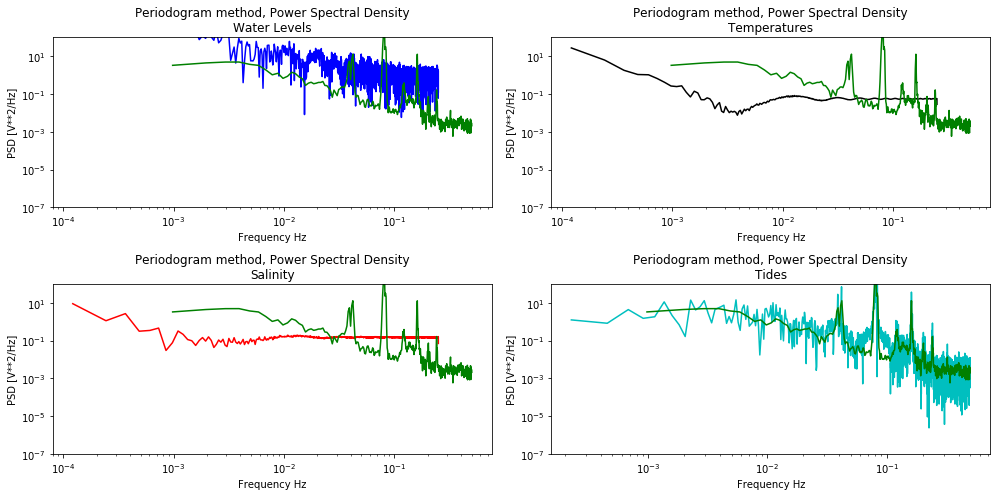

In [83]:
fig, ax = plt.subplots(2, 2, figsize=(14,7))

plt.subplot(2, 2, 1)
Periodogram_loglog_plot(wl_a, 0.5, 'b') #fs of 0.5 for 1/2 hr sample rate
plt.subplot(2, 2, 1)
Welchs_loglog_plot(tydl_a, 1, 'g') #fs of 1 for 1 hr sample rate
plt.ylim(10e-8, 100)
plt.title('Periodogram method, Power Spectral Density\nWater Levels')

plt.subplot(2, 2, 2)
Periodogram_loglog_plot(tmp_a, 0.5, 'k') #fs of 0.5 for 1/2 hr sample rate
plt.subplot(2, 2, 2)
Welchs_loglog_plot(tydl_a, 1, 'g') #fs of 1 for 1 hr sample rate
plt.ylim(10e-8, 100)
plt.title('Periodogram method, Power Spectral Density\nTemperatures')


plt.subplot(2, 2, 3)
Periodogram_loglog_plot(sal_a, 0.5, 'r') #fs of 0.5 for 1/2 hr sample rate
plt.subplot(2, 2, 3)
Welchs_loglog_plot(tydl_a, 1, 'g') #fs of 1 for 1 hr sample rate
plt.ylim(10e-8, 100)
plt.title('Periodogram method, Power Spectral Density\nSalinity')

plt.subplot(2, 2, 4)
Periodogram_loglog_plot(tydl_a, 1, 'c') #fs of 1 for 1 hr sample rate
plt.subplot(2, 2, 4)
Welchs_loglog_plot(tydl_a, 1, 'g') #fs of 1 for 1 hr sample rate
plt.ylim(10e-8, 100)
plt.title('Periodogram method, Power Spectral Density\nTides')

plt.tight_layout()
plt.show()

**Figure C.** Power Spectral Density (PSD) graphs for Water Levels, Temperatures, Salinity, and Tides at well 55a. The green line superimposed on the data is a Welch's Method PSD for local tidal data to visually check if there is any correlation. Lack of defined peaks in the collected data suggestes that there the is no periodicity in any of the data collected at well 55a. 

Well 55a is approximately XX feet deep with the bottom of the well at approximately -XX feet LMSL. If there was tidal influence we would see a peak develop at a frequency corresponding to tidal periods.